data[0]: [100, 5]
centers: [[54, 41], [16, 72]] dims: 2
[3156, 61] 0
[3156, 61] 1
centers: [[78.9, 1.525], [16, 72]] dims: 2
[3156, 61] 0
[3156, 61] 1
centers: [[78.9, 1.525], [16, 72]] dims: 2
[3156, 61] 0
[3156, 61] 1
centers: [[78.9, 1.525], [16, 72]] dims: 2
[3156, 61] 0
[3156, 61] 1
centers: [[78.9, 1.525], [16, 72]] dims: 2
[3156, 61] 0
[3156, 61] 1
[[78.9, 1.525], [16, 72]]
center: 0 dist: 1.475
center: 1 dist: 69.0
0


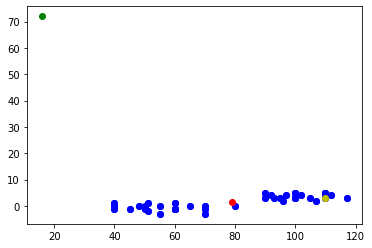

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
# Use matplotlib in notebook output
%matplotlib inline

# DEFINE DATA
# Data - [average passes, average goals (player goals - opponent goals)]
dataset = pd.read_csv("datasets/k_means_dataset.csv",
                      names=('player', 'opponent'))
X = dataset.values.tolist()

# PLOT THE DATA ON 2D GRAPH
plotx = []
ploty = []
for i in range(len(X)):
    plotx.append(X[i][0])
    ploty.append(X[i][1])
plt.plot(plotx, ploty, 'bo')

# HELPER FUNCTIONS


def random_centers(dim, k):
    centers = []
    for i in range(k):
        center = []
        for d in range(dim):
            rand = random.randint(0, 100)
            center.append(rand)
        centers.append(center)
    return centers


def point_clustering(data, centers, dims, first_cluster=False):
    for point in data:
        nearest_center = 0
        nearest_center_dist = None
        for i in range(0, len(centers)):
            euclidean_dist = 0
            for d in range(0, dims):
                dist = abs(point[d] - centers[i][d])
                euclidean_dist += dist
            euclidean_dist = np.sqrt(euclidean_dist)
            if nearest_center_dist == None:
                nearest_center_dist = euclidean_dist
                nearest_center = i
            elif nearest_center_dist > euclidean_dist:
                nearest_center_dist = euclidean_dist
                nearest_center = i
        if first_cluster:
            point.append(nearest_center)
        else:
            point[-1] = nearest_center
    return data


def mean_center(data, centers, dims):
    print('centers:', centers, 'dims:', dims)
    new_centers = []
    for i in range(len(centers)):
        new_center = []
        n_of_points = 0
        total_of_points = []
        for point in data:
            if point[-1] == i:
                n_of_points += 1
                for dim in range(0, dims):
                    if dim < len(total_of_points):
                        total_of_points[dim] += point[dim]
                    else:
                        total_of_points.append(point[dim])
        if len(total_of_points) != 0:
            for dim in range(0, dims):
                print(total_of_points, dim)
                new_center.append(total_of_points[dim]/n_of_points)
            new_centers.append(new_center)
        else:
            new_centers.append(centers[i])

    return new_centers

# H-MEANS CLUSTERING ALGORITHM
# Gets data and k, returns a list of center points.


def train_k_means_clustering(data, k=2, epochs=5):
    dims = len(data[0])
    print('data[0]:', data[0])
    centers = random_centers(dims, k)

    clustered_data = point_clustering(data, centers, dims, first_cluster=True)

    for i in range(epochs):
        centers = mean_center(clustered_data, centers, dims)
        clustered_data = point_clustering(
            data, centers, dims, first_cluster=False)

    return centers


def predict_k_means_clustering(point, centers):
    dims = len(point)
    center_dims = len(centers[0])

    if dims != center_dims:
        raise ValueError('Point given for prediction have', dims,
                         'dimensions but centers have', center_dims, 'dimensions')

    nearest_center = None
    nearest_dist = None

    for i in range(len(centers)):
        euclidean_dist = 0
        for dim in range(1, dims):
            dist = point[dim] - centers[i][dim]
            euclidean_dist += dist**2
        euclidean_dist = np.sqrt(euclidean_dist)
        if nearest_dist == None:
            nearest_dist = euclidean_dist
            nearest_center = i
        elif nearest_dist > euclidean_dist:
            nearest_dist = euclidean_dist
            nearest_center = i
        print('center:', i, 'dist:', euclidean_dist)

    return nearest_center


centers = train_k_means_clustering(X, k=2, epochs=5)
print(centers)

point = [110, 3]
print(predict_k_means_clustering(point, centers))

plt.plot(plotx, ploty, 'bo', centers[0][0], centers[0][1], 'ro',
         centers[1][0], centers[1][1], 'go', point[0], point[1], 'yo')


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
# Use matplotlib in notebook output
%matplotlib inline

In [2]:
# DEFINE DATA

# Data - [average passes, average goals (player goals - opponent goals)]
dataset=pd.read_csv("datasets/k_means_dataset.csv",names=('player','opponent'))
X = dataset.values.tolist()

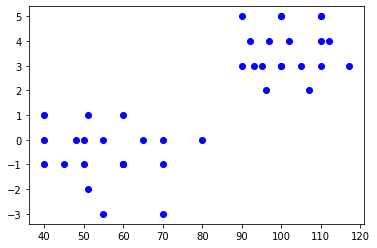

In [3]:
# PLOT THE DATA ON 2D GRAPH

plotx = []
ploty = []
for i in range(len(X)):
    plotx.append(X[i][0])
    ploty.append(X[i][1])
plt.plot(plotx,ploty, 'bo')

In [4]:
# HELPER FUNCTIONS

def random_centers(dim,k):
    centers = []
    for i in range(k):
        center = []
        for d in range(dim):
            rand = random.randint(0,100)
            center.append(rand)
        centers.append(center)
    return centers

def point_clustering(data, centers, dims, first_cluster=False):
    for point in data:
        nearest_center = 0
        nearest_center_dist = None
        for i in range(0, len(centers)):
            euclidean_dist = 0
            for d in range(0, dims):
                dist = abs(point[d] - centers[i][d])
                euclidean_dist += dist
            euclidean_dist = np.sqrt(euclidean_dist)
            if nearest_center_dist == None:
                nearest_center_dist = euclidean_dist
                nearest_center = i
            elif nearest_center_dist > euclidean_dist:
                nearest_center_dist = euclidean_dist
                nearest_center = i
        if first_cluster:
            point.append(nearest_center)
        else:
            point[-1] = nearest_center
    return data

def mean_center(data, centers, dims):
    print('centers:', centers, 'dims:', dims)
    new_centers = []
    for i in range(len(centers)):
        new_center = []
        n_of_points = 0
        total_of_points = []
        for point in data:
            if point[-1] == i:
                n_of_points += 1
                for dim in range(0,dims):
                    if dim < len(total_of_points):
                        total_of_points[dim] += point[dim]
                    else:
                        total_of_points.append(point[dim])
        if len(total_of_points) != 0:
            for dim in range(0,dims):
                print(total_of_points, dim)
                new_center.append(total_of_points[dim]/n_of_points)
            new_centers.append(new_center)
        else: 
            new_centers.append(centers[i])
        
            
    return new_centers

In [5]:
# H-MEANS CLUSTERING ALGORITHM

# Gets data and k, returns a list of center points.
def train_k_means_clustering(data, k=2, epochs=5):
    dims = len(data[0])
    print('data[0]:',data[0])
    centers = random_centers(dims,k)
    
    clustered_data = point_clustering(data, centers, dims, first_cluster=True)

    for i in range(epochs):
        centers = mean_center(clustered_data, centers, dims)
        clustered_data = point_clustering(data, centers, dims, first_cluster=False)
    
    return centers

def predict_k_means_clustering(point, centers):
    dims = len(point)
    center_dims = len(centers[0])
    
    if dims != center_dims:
        raise ValueError('Point given for prediction have', dims, 'dimensions but centers have', center_dims, 'dimensions')

    nearest_center = None
    nearest_dist = None
    
    for i in range(len(centers)):
        euclidean_dist = 0
        for dim in range(1, dims):
            dist = point[dim] - centers[i][dim]
            euclidean_dist += dist**2
        euclidean_dist = np.sqrt(euclidean_dist)
        if nearest_dist == None:
            nearest_dist = euclidean_dist
            nearest_center = i
        elif nearest_dist > euclidean_dist:
            nearest_dist = euclidean_dist
            nearest_center = i
        print('center:',i, 'dist:',euclidean_dist)
            
    return nearest_center

In [6]:
centers = train_k_means_clustering(X, k=2, epochs=5)

data[0]: [100, 5]
centers: [[49, 67], [29, 17]] dims: 2
[3156, 61] 0
[3156, 61] 1
centers: [[49, 67], [78.9, 1.525]] dims: 2
[3156, 61] 0
[3156, 61] 1
centers: [[49, 67], [78.9, 1.525]] dims: 2
[3156, 61] 0
[3156, 61] 1
centers: [[49, 67], [78.9, 1.525]] dims: 2
[3156, 61] 0
[3156, 61] 1
centers: [[49, 67], [78.9, 1.525]] dims: 2
[3156, 61] 0
[3156, 61] 1


In [7]:
print(centers)

[[49, 67], [78.9, 1.525]]
